In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
import seaborn as sb

In [135]:
import chardet
with open('data1.csv', 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv('data1.csv', encoding=result['encoding'])

In [136]:
df.columns

Index(['Country', 'AveragScore', 'SafetySecurity', 'PersonelFreedom',
       'Governance', 'SocialCapital', 'InvestmentEnvironment',
       'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality',
       'LivingConditions', 'Health', 'Education', 'NaturalEnvironment'],
      dtype='object')

In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

In [ ]:

african_countries = [
    "Algeria",
    "Angola",
    "Benin",
    "Botswana",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Comoros",
    "Congo",
    "Democratic Republic of the Congo",
    "Djibouti",
    "Egypt",
    "Equatorial Guinea",
    "Eritrea",
    "Eswatini",
    "Ethiopia",
    "Gabon",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Ivory Coast",
    "Kenya",
    "Lesotho",
    "Liberia",
    "Libya",
    "Madagascar",
    "Malawi",
    "Mali",
    "Mauritania",
    "Mauritius",
    "Morocco",
    "Mozambique",
    "Namibia",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Sao Tome and Principe",
    "Senegal",
    "Seychelles",
    "Sierra Leone",
    "Somalia",
    "South Africa",
    "South Sudan",
    "Sudan",
    "Tanzania",
    "Togo",
    "Tunisia",
    "Uganda",
    "Zambia",
    "Zimbabwe"
]

In [138]:
west_african_countries = [
    "Benin",
    "Burkina Faso",
    "Cape Verde",
    "Côte d'Ivoire", 
    "The Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Liberia",
    "Mali",
    "Mauritania",
    "Niger",
    "Nigeria",
    "Senegal",
    "Sierra Leone",
    "Togo"
]

print(west_african_countries)

['Benin', 'Burkina Faso', 'Cape Verde', "Côte d'Ivoire", 'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']


In [140]:
filtered_df = df[df['Country'].isin(african_countries)] 


In [141]:
filtered_df

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
46,Mauritius,65.65,80.80,68.30,63.85,61.47,64.84,59.18,64.65,52.93,80.22,71.86,68.68,50.97
50,Seychelles,63.65,76.03,61.62,60.46,58.97,56.79,57.68,61.62,48.05,79.59,77.44,66.43,59.19
82,Botswana,57.83,72.10,66.64,61.46,49.88,58.73,56.22,52.51,56.28,59.67,59.07,54.50,46.93
89,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03
95,Morocco,55.19,74.22,45.63,46.36,36.51,59.98,52.49,63.56,46.89,70.75,71.17,45.25,49.49
97,Ghana,54.66,69.75,68.40,54.49,50.62,47.00,59.64,45.80,39.68,58.90,63.08,45.75,52.85
98,Tunisia,54.46,59.83,56.75,50.66,38.73,48.28,49.98,52.94,43.34,78.07,72.05,56.90,45.96
101,Senegal,53.68,65.63,64.45,53.80,57.25,45.89,58.67,44.73,41.66,58.20,64.44,32.88,56.53
107,Kenya,52.25,47.64,55.10,47.51,57.03,56.50,56.46,47.56,45.76,49.52,65.21,48.21,50.48
108,Algeria,52.13,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29


In [142]:
df = filtered_df

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragScore,46.0,46.381522,7.292356,30.40,42.4450,46.105,49.8750,65.65
SafetySecurity,46.0,57.156087,15.075841,16.54,47.7625,62.045,67.2000,80.80
PersonelFreedom,46.0,47.485000,12.750402,16.77,38.7750,48.160,56.7150,68.40
Governance,46.0,40.004348,11.198306,22.16,31.7200,39.335,47.4425,63.85
SocialCapital,46.0,47.315435,7.053716,34.84,41.6925,47.645,52.6075,61.47
InvestmentEnvironment,46.0,40.291739,10.217782,22.54,33.7525,38.230,46.7225,64.84
EnterpriseConditions,46.0,47.088478,8.036693,30.51,41.1025,45.785,52.9950,59.64
MarketAccessInfrastructure,46.0,39.823043,9.654172,24.23,35.4425,37.810,45.2325,64.65
EconomicQuality,46.0,39.823696,6.423926,24.46,35.4925,39.725,43.2825,56.28
LivingConditions,46.0,49.351522,14.897782,21.99,40.6850,47.465,58.1900,80.22


In [144]:
df

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
46,Mauritius,65.65,80.80,68.30,63.85,61.47,64.84,59.18,64.65,52.93,80.22,71.86,68.68,50.97
50,Seychelles,63.65,76.03,61.62,60.46,58.97,56.79,57.68,61.62,48.05,79.59,77.44,66.43,59.19
82,Botswana,57.83,72.10,66.64,61.46,49.88,58.73,56.22,52.51,56.28,59.67,59.07,54.50,46.93
89,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03
95,Morocco,55.19,74.22,45.63,46.36,36.51,59.98,52.49,63.56,46.89,70.75,71.17,45.25,49.49
97,Ghana,54.66,69.75,68.40,54.49,50.62,47.00,59.64,45.80,39.68,58.90,63.08,45.75,52.85
98,Tunisia,54.46,59.83,56.75,50.66,38.73,48.28,49.98,52.94,43.34,78.07,72.05,56.90,45.96
101,Senegal,53.68,65.63,64.45,53.80,57.25,45.89,58.67,44.73,41.66,58.20,64.44,32.88,56.53
107,Kenya,52.25,47.64,55.10,47.51,57.03,56.50,56.46,47.56,45.76,49.52,65.21,48.21,50.48
108,Algeria,52.13,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29


In [145]:
df.duplicated().sum()

0

In [146]:
df.shape


(46, 14)

In [147]:
df.isna().sum()

Country                       0
AveragScore                   0
SafetySecurity                0
PersonelFreedom               0
Governance                    0
SocialCapital                 0
InvestmentEnvironment         0
EnterpriseConditions          0
MarketAccessInfrastructure    0
EconomicQuality               0
LivingConditions              0
Health                        0
Education                     0
NaturalEnvironment            0
dtype: int64

In [148]:
df.dropna()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
46,Mauritius,65.65,80.80,68.30,63.85,61.47,64.84,59.18,64.65,52.93,80.22,71.86,68.68,50.97
50,Seychelles,63.65,76.03,61.62,60.46,58.97,56.79,57.68,61.62,48.05,79.59,77.44,66.43,59.19
82,Botswana,57.83,72.10,66.64,61.46,49.88,58.73,56.22,52.51,56.28,59.67,59.07,54.50,46.93
89,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03
95,Morocco,55.19,74.22,45.63,46.36,36.51,59.98,52.49,63.56,46.89,70.75,71.17,45.25,49.49
97,Ghana,54.66,69.75,68.40,54.49,50.62,47.00,59.64,45.80,39.68,58.90,63.08,45.75,52.85
98,Tunisia,54.46,59.83,56.75,50.66,38.73,48.28,49.98,52.94,43.34,78.07,72.05,56.90,45.96
101,Senegal,53.68,65.63,64.45,53.80,57.25,45.89,58.67,44.73,41.66,58.20,64.44,32.88,56.53
107,Kenya,52.25,47.64,55.10,47.51,57.03,56.50,56.46,47.56,45.76,49.52,65.21,48.21,50.48
108,Algeria,52.13,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29


In [149]:
df.max()

Country                       Zimbabwe
AveragScore                      65.65
SafetySecurity                    80.8
PersonelFreedom                   68.4
Governance                       63.85
SocialCapital                    61.47
InvestmentEnvironment            64.84
EnterpriseConditions             59.64
MarketAccessInfrastructure       64.65
EconomicQuality                  56.28
LivingConditions                 80.22
Health                           77.44
Education                        68.68
NaturalEnvironment                60.3
dtype: object

In [150]:
df.columns


Index(['Country', 'AveragScore', 'SafetySecurity', 'PersonelFreedom',
       'Governance', 'SocialCapital', 'InvestmentEnvironment',
       'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality',
       'LivingConditions', 'Health', 'Education', 'NaturalEnvironment'],
      dtype='object')

In [151]:
# Calculate the 33rd and 66th percentiles
low_threshold = df['AveragScore'].quantile(0.33)
high_threshold = df['AveragScore'].quantile(0.66)

# Function to classify Prosperity Index into Low, Medium, High
def classify_prosperity(index):
    if index < low_threshold:
        return 0
    elif index < high_threshold:
        return 1
    else:
        return 2

# Apply classification
df['ProsperityClass'] = df['AveragScore'].apply(classify_prosperity)

In [152]:
df

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,ProsperityClass
46,Mauritius,65.65,80.80,68.30,63.85,61.47,64.84,59.18,64.65,52.93,80.22,71.86,68.68,50.97,2
50,Seychelles,63.65,76.03,61.62,60.46,58.97,56.79,57.68,61.62,48.05,79.59,77.44,66.43,59.19,2
82,Botswana,57.83,72.10,66.64,61.46,49.88,58.73,56.22,52.51,56.28,59.67,59.07,54.50,46.93,2
89,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03,2
95,Morocco,55.19,74.22,45.63,46.36,36.51,59.98,52.49,63.56,46.89,70.75,71.17,45.25,49.49,2
97,Ghana,54.66,69.75,68.40,54.49,50.62,47.00,59.64,45.80,39.68,58.90,63.08,45.75,52.85,2
98,Tunisia,54.46,59.83,56.75,50.66,38.73,48.28,49.98,52.94,43.34,78.07,72.05,56.90,45.96,2
101,Senegal,53.68,65.63,64.45,53.80,57.25,45.89,58.67,44.73,41.66,58.20,64.44,32.88,56.53,2
107,Kenya,52.25,47.64,55.10,47.51,57.03,56.50,56.46,47.56,45.76,49.52,65.21,48.21,50.48,2
108,Algeria,52.13,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29,2


In [153]:
from sklearn.utils import shuffle

df = shuffle(df).reset_index(drop=True)
df


,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,ProsperityClass
0,Lesotho,45.62,66.30,59.10,45.19,47.01,38.91,43.36,38.36,39.37,45.31,41.30,45.03,38.22,1
1,Uganda,46.83,53.01,41.77,38.49,51.21,48.37,53.02,39.83,42.04,46.42,58.49,37.24,52.11,1
2,Nigeria,44.00,39.30,49.61,36.46,54.39,41.05,45.85,36.90,37.73,49.22,50.12,37.50,49.91,1
3,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03,2
4,Guinea,44.47,59.67,48.03,36.75,52.24,39.51,52.35,37.87,33.15,40.64,48.65,27.83,56.99,1
5,Libya,43.46,30.16,38.88,24.48,50.31,27.84,32.88,39.67,45.75,71.57,67.84,48.82,43.26,1
6,Algeria,52.13,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29,2
7,Tunisia,54.46,59.83,56.75,50.66,38.73,48.28,49.98,52.94,43.34,78.07,72.05,56.90,45.96,2
8,Morocco,55.19,74.22,45.63,46.36,36.51,59.98,52.49,63.56,46.89,70.75,71.17,45.25,49.49,2
9,Zambia,47.14,66.05,48.29,42.03,50.63,43.20,52.92,35.98,30.93,40.82,57.20,39.04,58.60,1


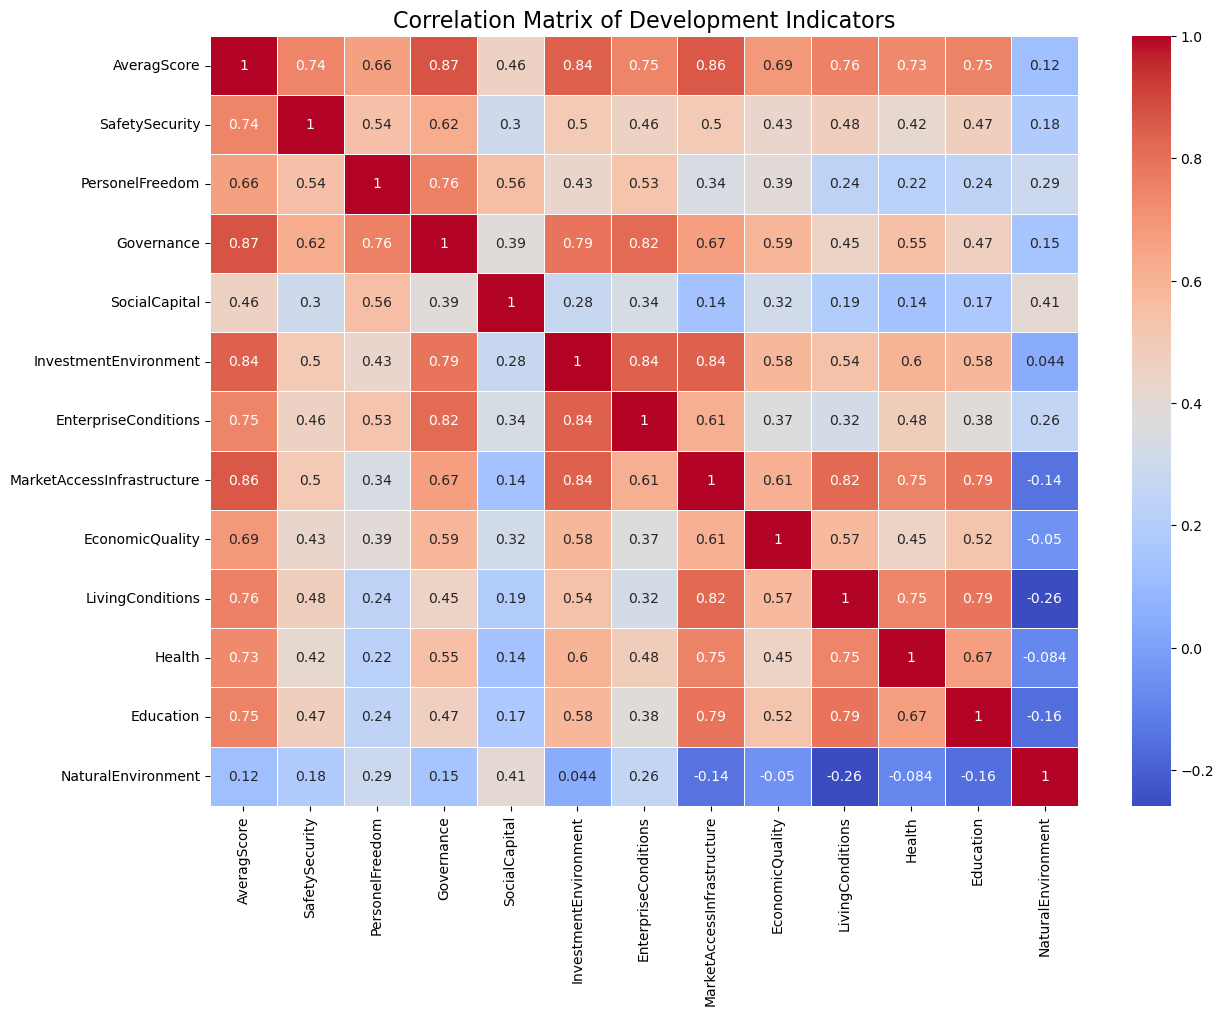

In [154]:
df['Country'] = df['Country'].str.strip()

numeric_df = df.drop(columns=['Country', 'ProsperityClass'])

numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(14, 10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Development Indicators', fontsize=16)
plt.show()

In [155]:
from sklearn.ensemble import RandomForestClassifier

# Features and target variable
X = df.drop(['Country', 'ProsperityClass', 'AveragScore'], axis=1)  # Features
y = df['ProsperityClass']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance')

# Output feature importance
print(feature_importance_df)


                       Feature  Importance
3                SocialCapital    0.018494
11          NaturalEnvironment    0.029157
9                       Health    0.049494
1              PersonelFreedom    0.066693
7              EconomicQuality    0.075663
5         EnterpriseConditions    0.081130
10                   Education    0.081766
8             LivingConditions    0.091863
2                   Governance    0.093109
4        InvestmentEnvironment    0.123075
0               SafetySecurity    0.144016
6   MarketAccessInfrastructure    0.145539


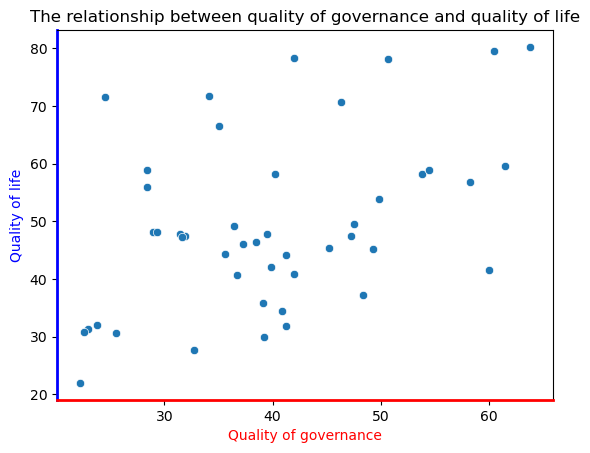

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot (no color added to the points)
sns.scatterplot(x='Governance', y='LivingConditions', data=df)

# Customize the plot title and labels
plt.title('The relationship between quality of governance and quality of life')

# Change the colors of the axes
plt.gca().spines['bottom'].set_color('red')   # Color x-axis in red
plt.gca().spines['left'].set_color('blue')    # Color y-axis in blue

# Set axis labels and colors
plt.xlabel('Quality of governance', color='red')   # Red x-axis label
plt.ylabel('Quality of life', color='blue')        # Blue y-axis label

# Make axes thicker for visibility
plt.gca().spines['bottom'].set_linewidth(2)   # Thicker x-axis
plt.gca().spines['left'].set_linewidth(2)     # Thicker y-axis

# Show the plot
plt.show()


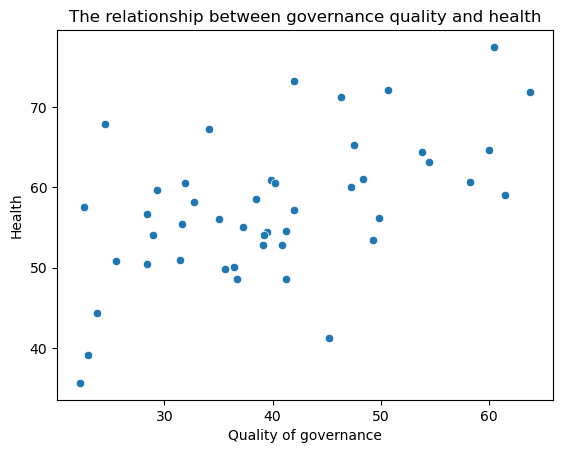

In [157]:
sns.scatterplot(x='Governance', y='Health', data=df)
plt.title('The relationship between governance quality and health')
plt.xlabel('Quality of governance')
plt.ylabel('Health')
plt.show()

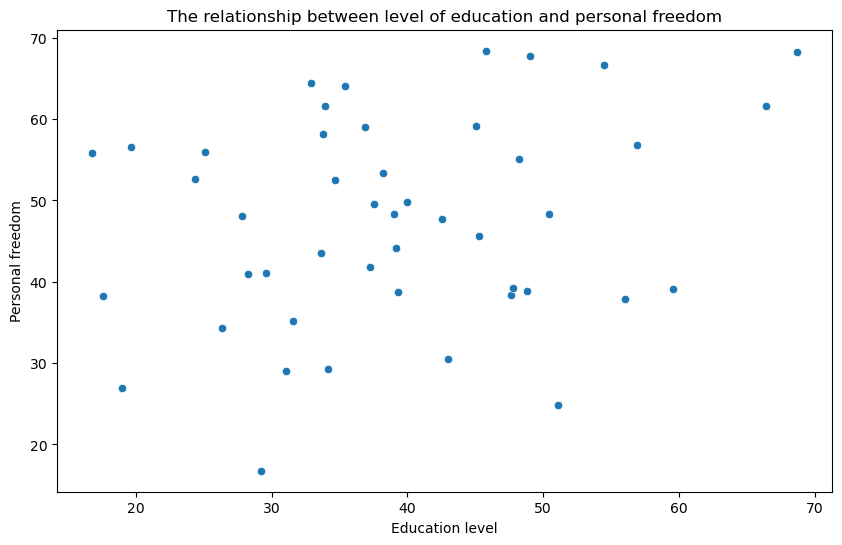

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Education', y='PersonelFreedom')
plt.title('The relationship between level of education and personal freedom')
plt.xlabel('Education level')
plt.ylabel('Personal freedom')
plt.show()


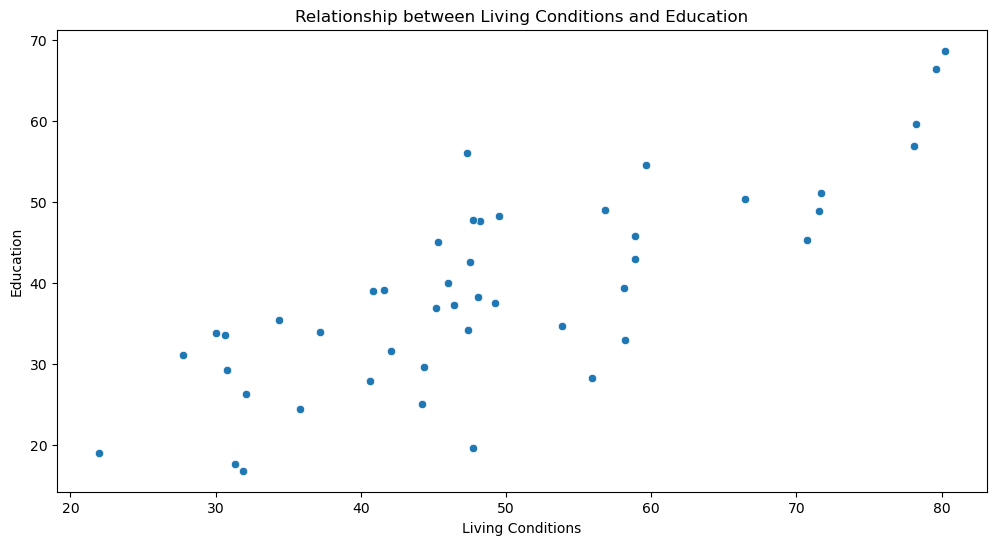

In [159]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='LivingConditions', y='Education')
plt.title('Relationship between Living Conditions and Education')
plt.xlabel('Living Conditions')
plt.ylabel('Education')
plt.show()

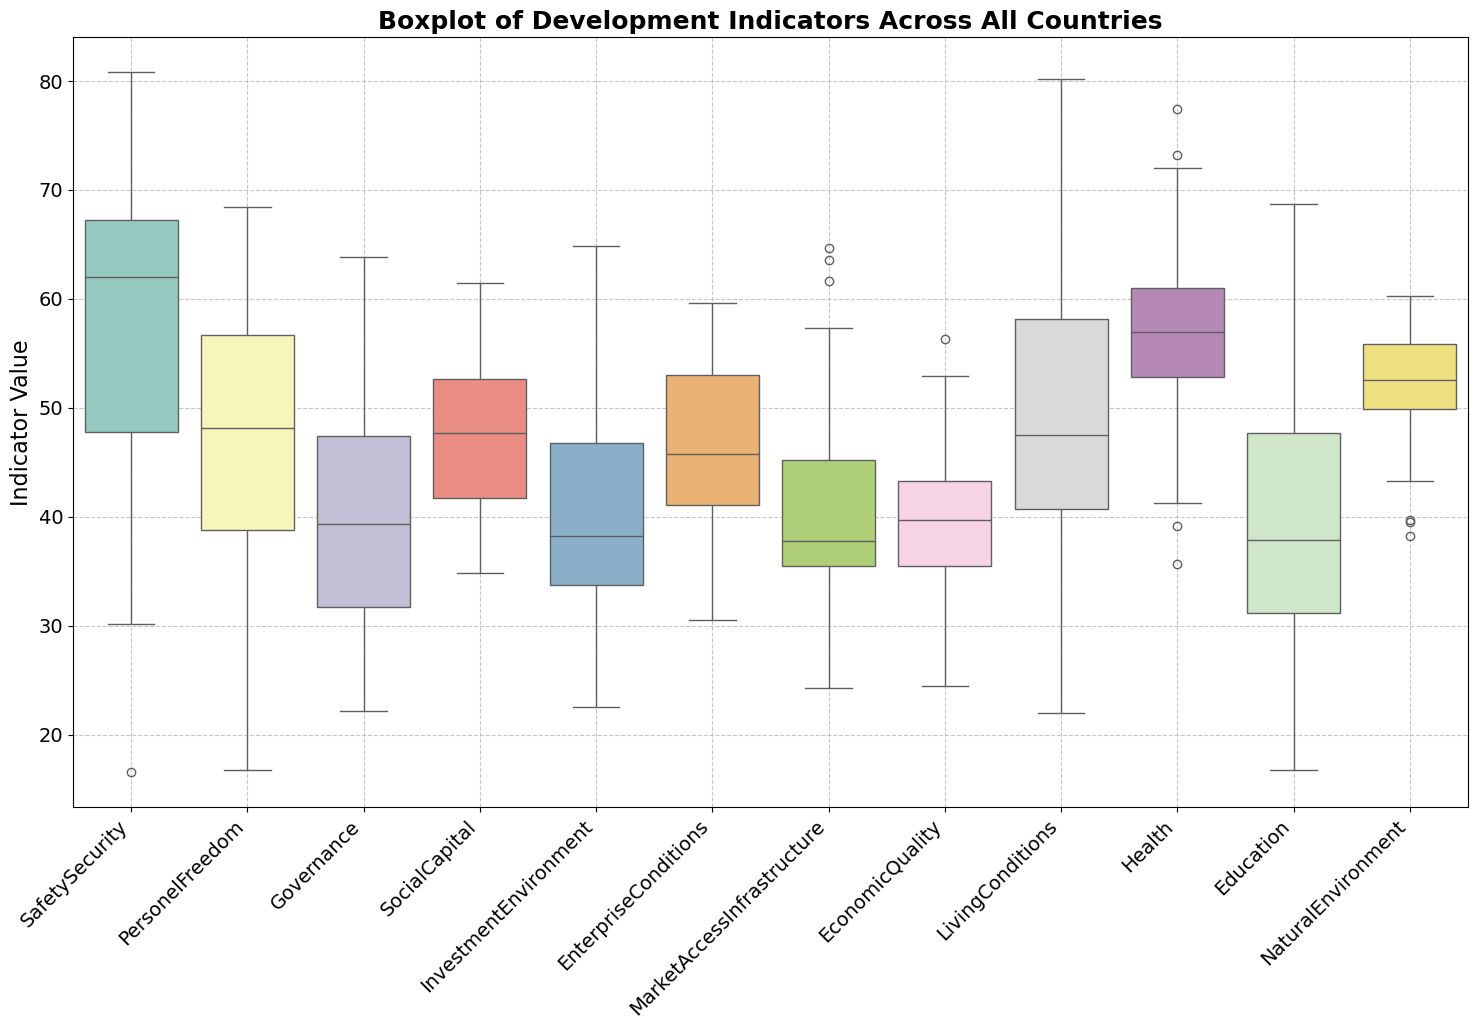

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

indicators = ['SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 
              'InvestmentEnvironment', 'EnterpriseConditions', 'MarketAccessInfrastructure', 
              'EconomicQuality', 'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']

plt.figure(figsize=(18, 10))
sns.boxplot(data=df[indicators], palette='Set3')
plt.title('Boxplot of Development Indicators Across All Countries', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Indicator Value', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

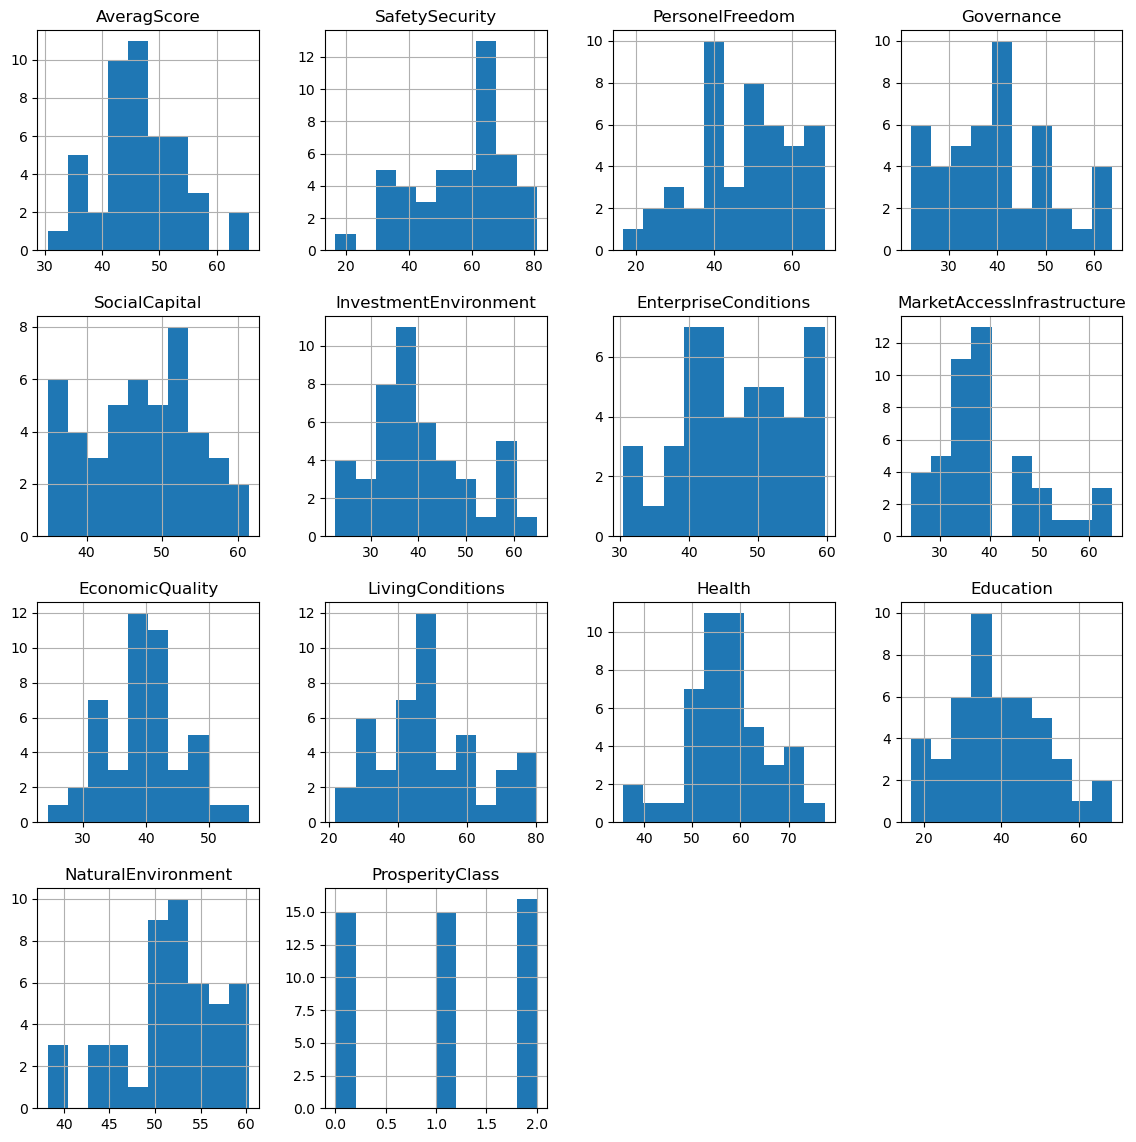

In [161]:
df.hist(figsize=(14,14))
plt.show()

In [162]:
 df['ProsperityClass'].value_counts()

ProsperityClass
2    16
1    15
0    15
Name: count, dtype: int64

In [163]:
df

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,ProsperityClass
0,Lesotho,45.62,66.30,59.10,45.19,47.01,38.91,43.36,38.36,39.37,45.31,41.30,45.03,38.22,1
1,Uganda,46.83,53.01,41.77,38.49,51.21,48.37,53.02,39.83,42.04,46.42,58.49,37.24,52.11,1
2,Nigeria,44.00,39.30,49.61,36.46,54.39,41.05,45.85,36.90,37.73,49.22,50.12,37.50,49.91,1
3,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03,2
4,Guinea,44.47,59.67,48.03,36.75,52.24,39.51,52.35,37.87,33.15,40.64,48.65,27.83,56.99,1
5,Libya,43.46,30.16,38.88,24.48,50.31,27.84,32.88,39.67,45.75,71.57,67.84,48.82,43.26,1
6,Algeria,52.13,74.70,39.10,41.96,39.33,38.98,43.05,51.12,39.95,78.24,73.22,59.57,46.29,2
7,Tunisia,54.46,59.83,56.75,50.66,38.73,48.28,49.98,52.94,43.34,78.07,72.05,56.90,45.96,2
8,Morocco,55.19,74.22,45.63,46.36,36.51,59.98,52.49,63.56,46.89,70.75,71.17,45.25,49.49,2
9,Zambia,47.14,66.05,48.29,42.03,50.63,43.20,52.92,35.98,30.93,40.82,57.20,39.04,58.60,1


Text(0.5, 1.0, 'Count of each Target Class')

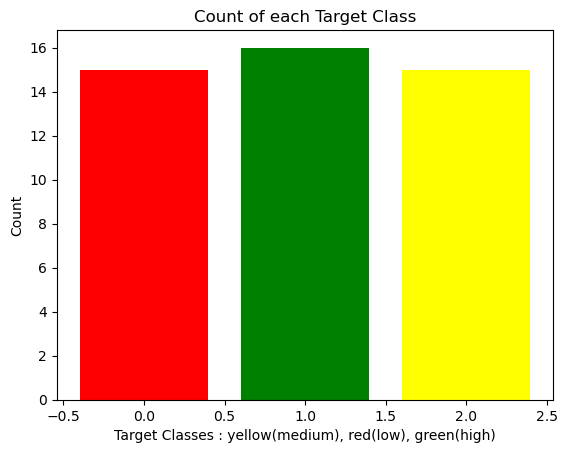

In [164]:
#frequency of target using bar chart
plt.bar(df['ProsperityClass'].unique(), df['ProsperityClass'].value_counts(), color = ['green', 'yellow','red'])

plt.xlabel('Target Classes : yellow(medium), red(low), green(high)')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [165]:
import joblib
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features

df_scaled =pd.DataFrame(scaler.fit_transform(df.drop(columns=['Country','Health', 'EconomicQuality','AveragScore' ,'ProsperityClass','SocialCapital', 'NaturalEnvironment','EnterpriseConditions', 'PersonelFreedom', 'SafetySecurity'],axis = 1)))
scaled_df = pd.concat([df_scaled,df['ProsperityClass']],axis = 1)

# Save the scaler and the trained model
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [166]:
scaled_df

,0,1,2,3,4,ProsperityClass
0,0.468192,-0.136723,-0.153220,-0.274281,0.488387,1
1,-0.136724,0.799344,0.000729,-0.198950,-0.152764,1
2,-0.320005,0.075030,-0.306121,-0.008926,-0.131365,1
3,1.648230,1.305969,1.160054,0.504818,0.815135,2
4,-0.293822,-0.077353,-0.204536,-0.591214,-0.927248,1
5,-1.401631,-1.232100,-0.016028,1.507875,0.800320,1
6,0.176568,-0.129797,1.183093,1.960540,1.685092,2
7,0.962056,0.790439,1.373696,1.949003,1.465340,2
8,0.573826,1.948154,2.485894,1.452225,0.506494,2
9,0.182888,0.287773,-0.402469,-0.578999,-0.004616,1


In [167]:
df = scaled_df

In [168]:
df

,0,1,2,3,4,ProsperityClass
0,0.468192,-0.136723,-0.153220,-0.274281,0.488387,1
1,-0.136724,0.799344,0.000729,-0.198950,-0.152764,1
2,-0.320005,0.075030,-0.306121,-0.008926,-0.131365,1
3,1.648230,1.305969,1.160054,0.504818,0.815135,2
4,-0.293822,-0.077353,-0.204536,-0.591214,-0.927248,1
5,-1.401631,-1.232100,-0.016028,1.507875,0.800320,1
6,0.176568,-0.129797,1.183093,1.960540,1.685092,2
7,0.962056,0.790439,1.373696,1.949003,1.465340,2
8,0.573826,1.948154,2.485894,1.452225,0.506494,2
9,0.182888,0.287773,-0.402469,-0.578999,-0.004616,1


In [169]:
# Features and target variable
X = df.drop('ProsperityClass', axis=1)  # Features
y = df['ProsperityClass']  # Target variable
X.columns = X.columns.astype(str)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [170]:
# Evaluate Decision Tree Model
y_pred = rf.predict(X_test)


In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target variable for the test set
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Weighted for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Weighted for multiclass

# Print the metrics
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Model Precision: {precision * 100:.2f}%")
print(f"Model Recall: {recall * 100:.2f}%")
print(f"Model F1-Score: {f1 * 100:.2f}%")


Model Accuracy: 92.86%
Model Precision: 94.64%
Model Recall: 92.86%
Model F1-Score: 92.65%


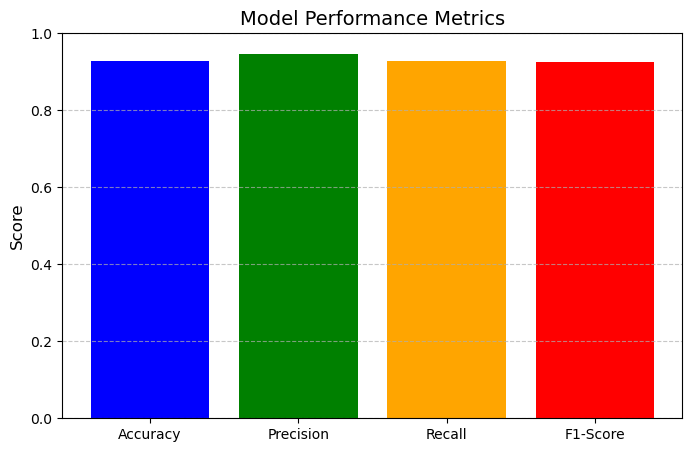

In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target variable for the test set
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Metrics as a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Metrics', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


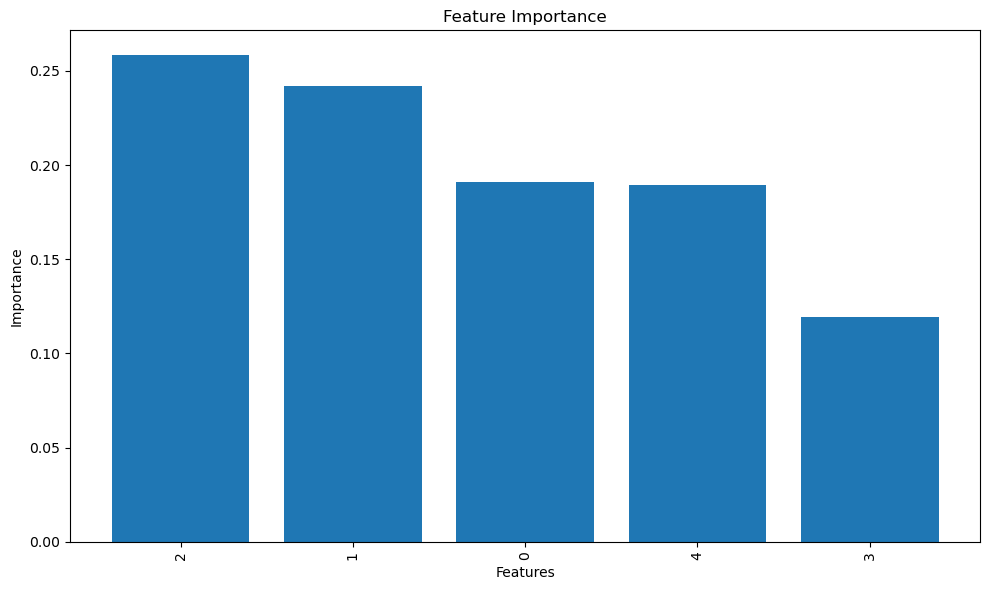

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


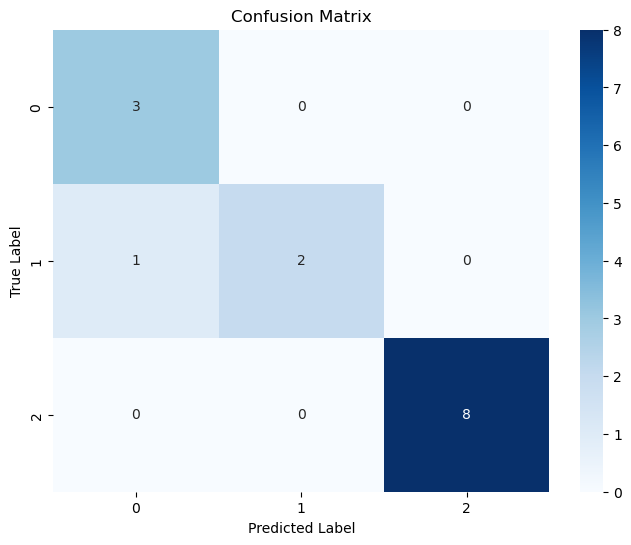

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


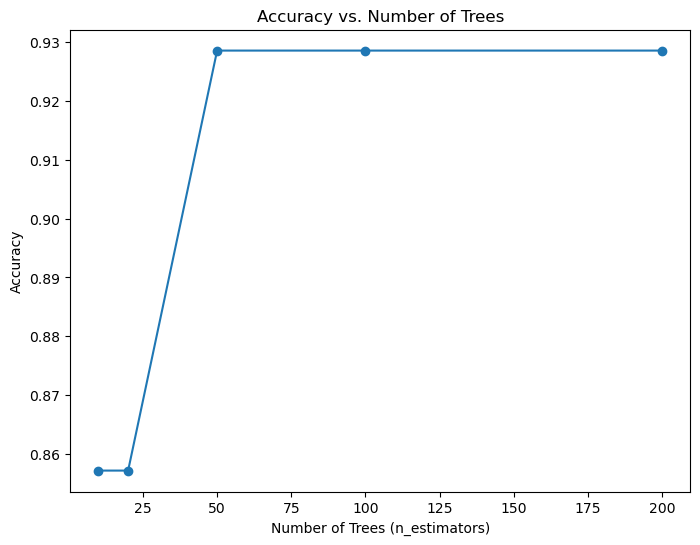

In [175]:
accuracies = []
n_estimators = [10, 20, 50, 100, 200]

for n in n_estimators:
    rf_temp = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_temp.fit(X_train, y_train)
    y_pred_temp = rf_temp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_temp))

# Plot accuracy vs. number of trees
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, accuracies, marker='o')
plt.title('Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.show()


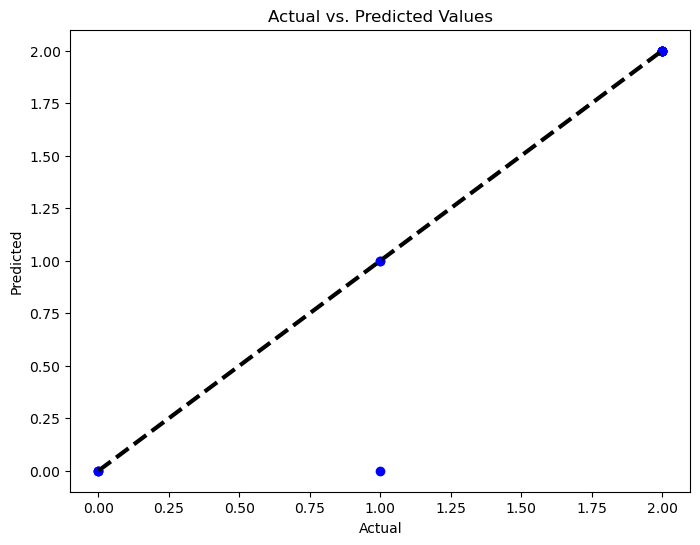

In [176]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


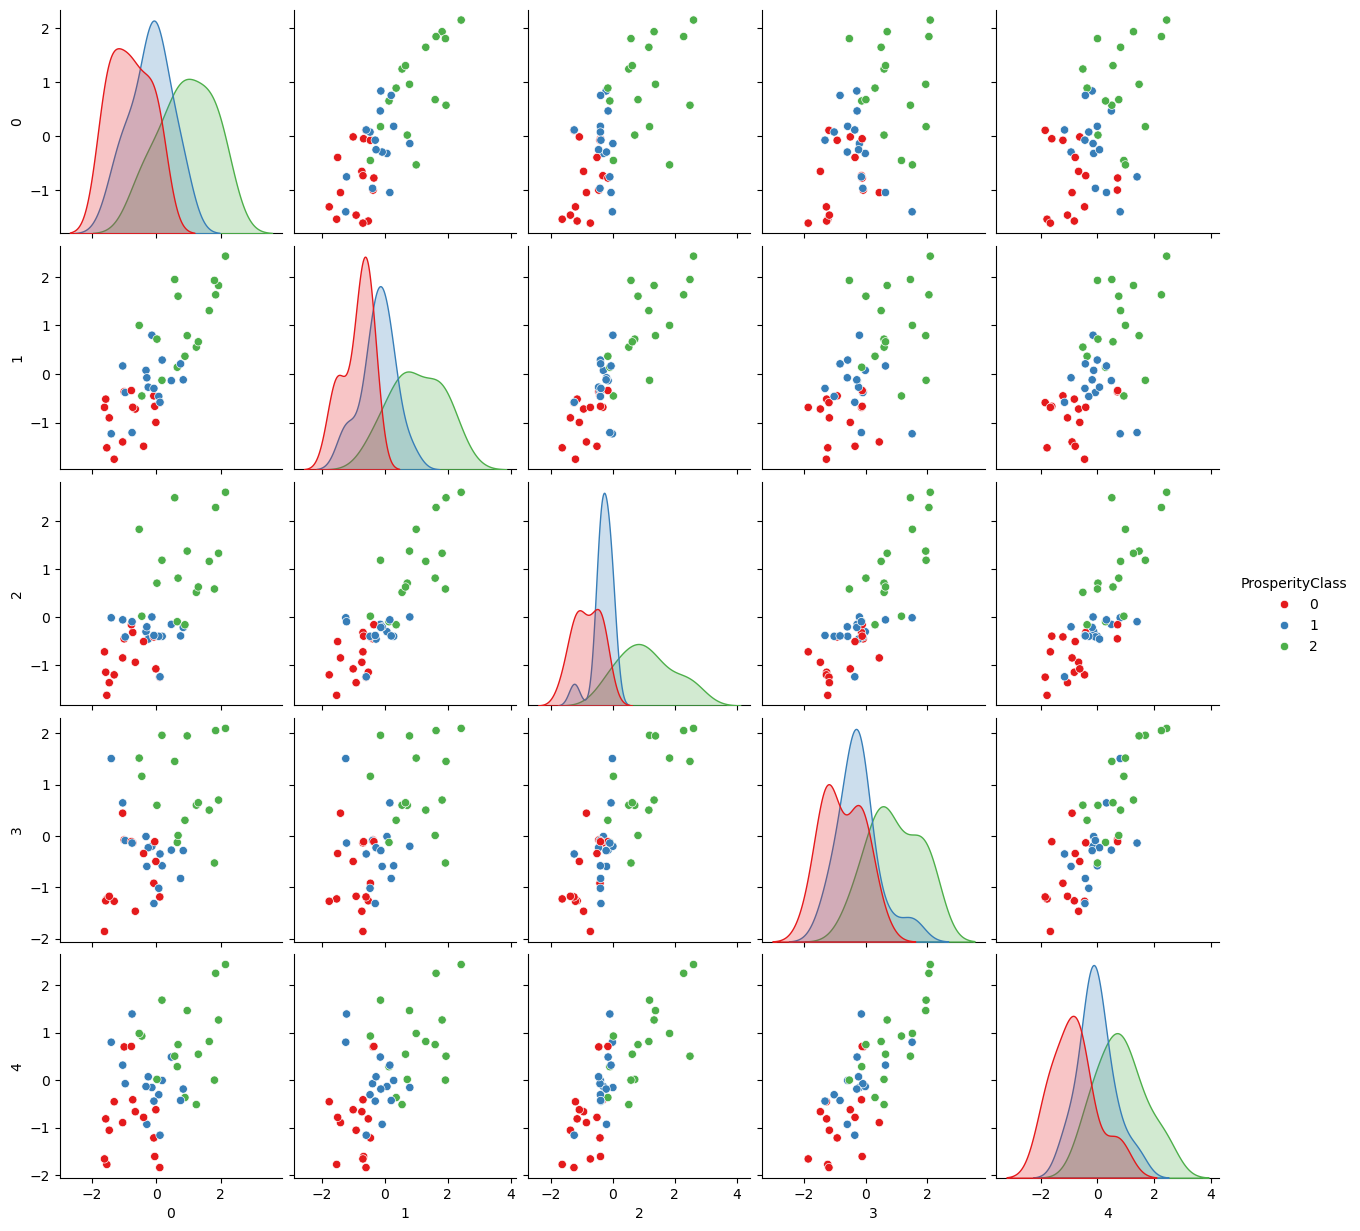

In [177]:
# Pair plot to visualize relationships between features and prosperity class
sns.pairplot(df, hue='ProsperityClass', palette='Set1')
plt.show()


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'random_forest_model.pkl')


In [179]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [180]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the saved Random Forest model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the feature names
feature_names = [
    'Governance', 'LivingConditions', 'Health', 'Education',
    'InvestmentEnvironment', 'MarketAccessInfrastructure', 'EconomicQuality'
]

# Create a function to make predictions
def predict_prosperity_class(input_data):
    # Reshape input data for scaling
    input_data = np.array(input_data).reshape(1, -1)
    
    # Scale the input data using the loaded scaler
    scaled_data = scaler.transform(input_data)
    
    # Make the prediction
    prediction = model.predict(scaled_data)
    
    return prediction[0]

# Title of the Streamlit app
st.title('Prosperity Class Prediction App')

# Create input sliders for each feature
input_values = []
for feature in feature_names:
    value = st.slider(f'Enter value for {feature}', min_value=0.0, max_value=100.0, value=50.0)
    input_values.append(value)

# Button to make predictions
if st.button('Predict Prosperity Class'):
    # Perform the prediction
    prosperity_class = predict_prosperity_class(input_values)
    
    # Display the prediction result
    if prosperity_class == 0:
        st.success('Prediction: Low Prosperity')
    elif prosperity_class == 1:
        st.info('Prediction: Medium Prosperity')
    else:
        st.warning('Prediction: High Prosperity')

# Display feature importance if the user clicks the button
if st.checkbox('Show Feature Importance'):
    importances = model.feature_importances_
    st.bar_chart(pd.DataFrame({'Feature': feature_names, 'Importance': importances}).set_index('Feature'))

# Add an explanation section about the model
st.sidebar.header('Model Details')
st.sidebar.write('This application uses a pre-trained Random Forest model to classify countries into one of three prosperity classes: Low, Medium, or High, based on various development indicators.')


2025-02-02 17:08:06.117 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
